In [30]:
#import dependencies
import os
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import DataFrame

# Shot Types Analysis

In [45]:
game_plays_df=pd.read_csv("game_plays.csv")
game_plays_df.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
0,2016020045_1,2016020045,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-18 23:40:58,0,0,Game Scheduled,NaN,NaN
1,2016020045_2,2016020045,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:35:28,0,0,Period Ready,NaN,NaN
2,2016020045_3,2016020045,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Period Start,NaN,NaN
3,2016020045_4,2016020045,16.0,4.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Jonathan Toews faceoff won against Claude Giroux,0.0,0.0
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0


In [12]:
#nullplays=plays.isna().sum()
# Percentage of null values
#nullplays/len(plays)

play_id                0.000000
game_id                0.000000
team_id_for            0.184675
team_id_against        0.184675
event                  0.000000
secondaryType          0.765962
x                      0.224603
y                      0.224597
period                 0.000000
periodType             0.000000
periodTime             0.000000
periodTimeRemaining    0.038218
dateTime               0.000000
goals_away             0.000000
goals_home             0.000000
description            0.000000
st_x                   0.224603
st_y                   0.224603
dtype: float64

In [46]:
game_plays_df.event.unique()

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff',
       'Shot', 'Goal', 'Takeaway', 'Hit', 'Stoppage', 'Blocked Shot',
       'Giveaway', 'Missed Shot', 'Penalty', 'Period End',
       'Period Official', 'Game End', 'Official Challenge',
       'Shootout Complete', 'Early Intermission Start',
       'Early Intermission End', 'Game Official', 'Emergency Goaltender'],
      dtype=object)

In [48]:
# get plays that are either a shot or a goal
shots_df = game_plays_df.loc[(game_plays_df['event'] == 'Shot') | (game_plays_df['event'] == 'Goal')]

# remove N/A's
shots_df = shots_df.dropna()
shots_df.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0
5,2016020045_6,2016020045,16.0,4.0,Goal,Wrap-around,-88.0,5.0,1,REGULAR,56,1144.0,2016-10-19 01:41:48,0,1,"Patrick Kane (1) Wrap-around, assists: Artem A...",88.0,-5.0
7,2016020045_8,2016020045,4.0,16.0,Shot,Wrist Shot,56.0,-7.0,1,REGULAR,69,1131.0,2016-10-19 01:42:41,0,1,Dale Weise Wrist Shot saved by Corey Crawford,56.0,-7.0
11,2016020045_12,2016020045,16.0,4.0,Shot,Slap Shot,-37.0,-24.0,1,REGULAR,133,1067.0,2016-10-19 01:43:45,0,1,Duncan Keith Slap Shot saved by Michal Neuvirth,37.0,24.0
16,2016020045_17,2016020045,4.0,16.0,Shot,Wrist Shot,57.0,-20.0,1,REGULAR,168,1032.0,2016-10-19 01:44:54,0,1,Wayne Simmonds Wrist Shot saved by Corey Crawford,57.0,-20.0


In [49]:
shots_df.secondaryType = pd.Categorical(shots_df.secondaryType)
shots_df['shot_type'] = shots_df.secondaryType.cat.codes

shots_df[['secondaryType','shot_type']].head()


,secondaryType,shot_type
4,Wrist Shot,6
5,Wrap-around,5
7,Wrist Shot,6
11,Slap Shot,2
16,Wrist Shot,6


In [50]:
# Descriptive Statistics of Shots
shots.describe()

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,1.634300e+06,1.634300e+06,1.634300e+06,1.630454e+06,1.630455e+06,1.634300e+06,1.634300e+06,1.630515e+06,1.634300e+06,1.634300e+06,1.630454e+06,1.630454e+06
mean,2.015288e+09,1.789367e+01,1.788835e+01,1.084851e-02,-2.141985e-01,2.045238e+00,5.923074e+02,5.900185e+02,1.230772e+00,1.355974e+00,2.560500e+01,-3.365320e-02
std,3.021783e+06,1.259754e+01,1.259401e+01,6.324661e+01,1.795777e+01,8.782493e-01,3.500733e+02,3.478368e+02,1.302252e+00,1.397407e+00,5.783180e+01,1.795901e+01
min,2.005020e+09,1.000000e+00,1.000000e+00,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-4.200000e+01
25%,2.013020e+09,8.000000e+00,8.000000e+00,-6.400000e+01,-1.300000e+01,1.000000e+00,2.850000e+02,2.860000e+02,0.000000e+00,0.000000e+00,-4.500000e+01,-1.300000e+01
50%,2.016020e+09,1.700000e+01,1.700000e+01,-2.000000e+00,0.000000e+00,2.000000e+00,5.850000e+02,5.920000e+02,1.000000e+00,1.000000e+00,5.000000e+01,0.000000e+00
75%,2.018021e+09,2.400000e+01,2.400000e+01,6.400000e+01,1.200000e+01,3.000000e+00,8.950000e+02,8.930000e+02,2.000000e+00,2.000000e+00,7.100000e+01,1.300000e+01
max,2.019041e+09,9.000000e+01,9.000000e+01,9.900000e+01,4.200000e+01,8.000000e+00,1.200000e+03,1.200000e+03,1.000000e+01,1.000000e+01,9.900000e+01,4.200000e+01


In [51]:
# Types of Shots
shots.secondaryType.unique()

array(['Wrist Shot', 'Slap Shot', nan, 'Tip-In', 'Snap Shot', 'Backhand',
       'Deflected', 'Wrap-around'], dtype=object)

[Text(0, 0, 'Wrist Shot'),
 Text(1, 0, 'Snap Shot'),
 Text(2, 0, 'Slap Shot'),
 Text(3, 0, 'Backhand'),
 Text(4, 0, 'Tip-In'),
 Text(5, 0, 'Deflected'),
 Text(6, 0, 'Wrap-around')]

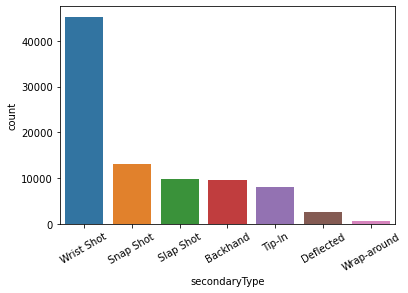

In [52]:
plot=sns.countplot(x = 'secondaryType',
              data = Goals,
              order = Goals['secondaryType'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(),rotation=30)

[Text(0, 0, 'Wrist Shot'),
 Text(1, 0, 'Slap Shot'),
 Text(2, 0, 'Snap Shot'),
 Text(3, 0, 'Backhand'),
 Text(4, 0, 'Tip-In'),
 Text(5, 0, 'Deflected'),
 Text(6, 0, 'Wrap-around')]

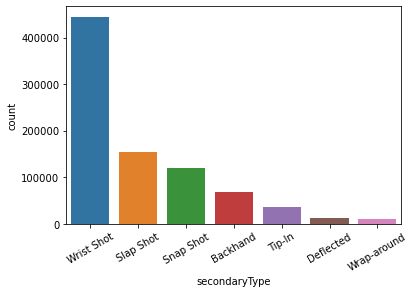

In [53]:
totalshots=shots.groupby('secondaryType').count()
plot2=sns.countplot(x = 'secondaryType',
              data = shots,
              order = shots['secondaryType'].value_counts().index)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=30)

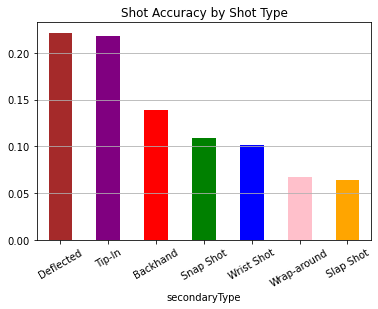

In [54]:
#Shot Accuracy by type
shotaccuracy=totalgoals/totalshots
shotaccuracy.iloc[:,1].loc[["Deflected", "Tip-In", "Backhand","Snap Shot","Wrist Shot","Wrap-around","Slap Shot"]].plot(kind='bar',title='Shot Accuracy by Shot Type',color=['brown', 'purple', 'red', 'g','b','pink','orange'],rot=30).grid(axis='y')

In [68]:
# sample shots w/o replacement
shots_sample_df = shots_df.sample(n=1000, replace=False)

# LogisticRegression

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = shots_sample_df[['shot_type']]
y = shots_sample_df['event']
indicies = range(len(shots_sample_df))

# train with 75% of sample
X_train, X_test, y_train, y_test, train_indicies, test_indicies = train_test_split(X, y, indicies, test_size=0.25)

In [71]:
# perform logistic regression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# use the model on the test set and save the prob of goal
prob = logisticRegr.predict_proba(X_test)[:,[0]]

In [72]:
# print the model's score
score = logisticRegr.score(X_test, y_test)
print(score)

0.904


# Home Advantage Analysis

In [32]:
games = pd.read_csv('game.csv')
games.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [33]:
# Function decides if home team won by checking the goals scored by home and away team and returns appropriate result

def home_team_win(df):
    if df['home_goals'] > df['away_goals']:
        return 1
    else:
        return 0

games['home_team_win'] = games.apply(home_team_win, axis=1)

games.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,home_team_win
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT,0
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT,0
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT,1
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT,1


In [34]:
# Format for choosing only a single column: data_frame[column]

games = games[['season', 'type', 'home_goals', 'away_goals', 'venue', 'home_team_win']]

games.head()

,season,type,home_goals,away_goals,venue,home_team_win
0,20162017,R,7,4,United Center,1
1,20172018,R,3,4,KeyBank Center,0
2,20152016,R,1,4,MTS Centre,0
3,20152016,R,2,1,PNC Arena,1
4,20172018,R,2,1,Honda Center,1


In [35]:
# Format for conditional selection: data_frame[condition]

regularGames = games[games.type == 'R']

regularGames.head()

,season,type,home_goals,away_goals,venue,home_team_win
0,20162017,R,7,4,United Center,1
1,20172018,R,3,4,KeyBank Center,0
2,20152016,R,1,4,MTS Centre,0
3,20152016,R,2,1,PNC Arena,1
4,20172018,R,2,1,Honda Center,1


In [36]:
# Format: data_frame.column.mean()
regularGames.home_goals.mean()

2.9686146756187677

In [37]:
regularGames.away_goals.mean()

2.6901593103174286

In [38]:
regularGames.home_team_win.mean()

0.5347026339835526

<AxesSubplot:ylabel='home_team_win'>

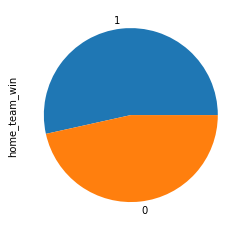

In [44]:
regularGames.home_team_win.value_counts().plot.pie()

# Logistic Regression Classification

In [100]:
#X = shot_log_model.drop(['SHOT_RESULT', 'FGM', 'PTS'], axis =1)
X = regularGames.drop(['home_team_win','type','venue'], axis =1)

#create target
y = regularGames['home_team_win']

# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    10102
0     8776
Name: home_team_win, dtype: int64 

 1    3357
0    2936
Name: home_team_win, dtype: int64


In [101]:
# Instantiating the model
logreg = LogisticRegression()

In [102]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

In [103]:
logreg.predict(X_test) # Shows the predicted outputs...will be compare below...

array([1, 1, 1, ..., 1, 1, 1])

In [104]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.5334498649292865

Model Score for the Train data:


0.5351202457887488

In [105]:
y_pred = logreg.predict(X_test)

In [108]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.5334498649292865


In [110]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2936
           1       0.53      1.00      0.70      3357

    accuracy                           0.53      6293
   macro avg       0.27      0.50      0.35      6293
weighted avg       0.28      0.53      0.37      6293



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plays Analysis

In [124]:
team_info = pd.read_csv("team_info.csv")
team_stats = pd.read_csv("game_teams_stats.csv")
teams = team_info.merge(team_stats, on='team_id')
teams

,team_id,franchiseId,shortName,teamName,abbreviation,link,game_id,HoA,won,settled_in,...,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2016020107,home,False,OT,...,32.0,22.0,10.0,4.0,1.0,43.3,7.0,7.0,16.0,right
1,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020981,home,False,REG,...,18.0,21.0,12.0,3.0,0.0,50.9,7.0,2.0,2.0,right
2,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020482,away,False,OT,...,32.0,27.0,6.0,3.0,0.0,49.1,12.0,5.0,25.0,left
3,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020453,away,True,REG,...,21.0,10.0,6.0,1.0,0.0,44.4,2.0,4.0,18.0,right
4,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020952,home,True,REG,...,33.0,34.0,4.0,1.0,0.0,47.3,11.0,11.0,9.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52585,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001021062,away,True,OT,...,15.0,NaN,43.0,2.0,0.0,NaN,NaN,NaN,NaN,right
52586,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020861,away,False,REG,...,25.0,NaN,6.0,2.0,0.0,NaN,NaN,NaN,NaN,left
52587,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020628,home,False,REG,...,25.0,NaN,9.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
52588,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020436,away,False,REG,...,25.0,NaN,19.0,2.0,1.0,NaN,NaN,NaN,NaN,right


In [112]:
teams.columns

Index(['team_id', 'franchiseId', 'shortName', 'teamName', 'abbreviation',
       'link', 'game_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide', 'TakeawayDiff', 'away_binary', 'home_binary',
       'OT_binary', 'REG_binary', 'tbc_binary', 'away_binary', 'home_binary',
       'OT_binary', 'REG_binary', 'tbc_binary'],
      dtype='object')

In [159]:
teams.dropna(inplace=True)
teams

,team_id,franchiseId,shortName,teamName,abbreviation,link,game_id,HoA,won,settled_in,...,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2016020107,home,False,OT,...,32.0,22.0,10.0,4.0,1.0,43.3,7.0,7.0,16.0,right
1,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020981,home,False,REG,...,18.0,21.0,12.0,3.0,0.0,50.9,7.0,2.0,2.0,right
2,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020482,away,False,OT,...,32.0,27.0,6.0,3.0,0.0,49.1,12.0,5.0,25.0,left
3,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020453,away,True,REG,...,21.0,10.0,6.0,1.0,0.0,44.4,2.0,4.0,18.0,right
4,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020952,home,True,REG,...,33.0,34.0,4.0,1.0,0.0,47.3,11.0,11.0,9.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51844,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020593,away,True,REG,...,31.0,19.0,4.0,6.0,1.0,54.4,0.0,7.0,18.0,left
51847,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020369,away,False,REG,...,22.0,15.0,9.0,2.0,1.0,46.2,2.0,3.0,7.0,right
51849,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020356,away,True,OT,...,31.0,16.0,8.0,4.0,0.0,50.0,7.0,12.0,18.0,left
51852,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020726,away,False,REG,...,22.0,22.0,6.0,2.0,0.0,46.6,7.0,6.0,16.0,right


In [161]:
teams.fillna(0)
teams

,team_id,franchiseId,shortName,teamName,abbreviation,link,game_id,HoA,won,settled_in,...,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2016020107,home,False,OT,...,32.0,22.0,10.0,4.0,1.0,43.3,7.0,7.0,16.0,right
1,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020981,home,False,REG,...,18.0,21.0,12.0,3.0,0.0,50.9,7.0,2.0,2.0,right
2,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020482,away,False,OT,...,32.0,27.0,6.0,3.0,0.0,49.1,12.0,5.0,25.0,left
3,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020453,away,True,REG,...,21.0,10.0,6.0,1.0,0.0,44.4,2.0,4.0,18.0,right
4,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020952,home,True,REG,...,33.0,34.0,4.0,1.0,0.0,47.3,11.0,11.0,9.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51844,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020593,away,True,REG,...,31.0,19.0,4.0,6.0,1.0,54.4,0.0,7.0,18.0,left
51847,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020369,away,False,REG,...,22.0,15.0,9.0,2.0,1.0,46.2,2.0,3.0,7.0,right
51849,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020356,away,True,OT,...,31.0,16.0,8.0,4.0,0.0,50.0,7.0,12.0,18.0,left
51852,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2010020726,away,False,REG,...,22.0,22.0,6.0,2.0,0.0,46.6,7.0,6.0,16.0,right


In [162]:
#make the 'won' column data binary
teams['won'] = teams['won']*1

teams = pd.concat([teams, pd.get_dummies(teams.HoA).rename(columns = '{}_binary'.format)],axis = 1)
teams = pd.concat([teams, pd.get_dummies(teams.settled_in).rename(columns = '{}_binary'.format)],axis = 1)
df_clean = teams.drop(['game_id','team_id','HoA','settled_in','head_coach','away_binary','OT_binary'], axis=1)
df_clean.head()

,franchiseId,shortName,teamName,abbreviation,link,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,home_binary,REG_binary
0,23,New Jersey,Devils,NJD,/api/v1/teams/1,0,2.0,32.0,22.0,10.0,4.0,1.0,43.3,7.0,7.0,16.0,right,1,0
1,23,New Jersey,Devils,NJD,/api/v1/teams/1,0,1.0,18.0,21.0,12.0,3.0,0.0,50.9,7.0,2.0,2.0,right,1,1
2,23,New Jersey,Devils,NJD,/api/v1/teams/1,0,1.0,32.0,27.0,6.0,3.0,0.0,49.1,12.0,5.0,25.0,left,0,0
3,23,New Jersey,Devils,NJD,/api/v1/teams/1,1,2.0,21.0,10.0,6.0,1.0,0.0,44.4,2.0,4.0,18.0,right,0,1
4,23,New Jersey,Devils,NJD,/api/v1/teams/1,1,2.0,33.0,34.0,4.0,1.0,0.0,47.3,11.0,11.0,9.0,right,1,1


In [163]:
teams.columns

Index(['team_id', 'franchiseId', 'shortName', 'teamName', 'abbreviation',
       'link', 'game_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide', 'away_binary', 'home_binary', 'OT_binary',
       'REG_binary'],
      dtype='object')

In [164]:
teams.dtypes


team_id                     int64
franchiseId                 int64
shortName                  object
teamName                   object
abbreviation               object
link                       object
game_id                     int64
HoA                        object
won                         int64
settled_in                 object
head_coach                 object
goals                     float64
shots                     float64
hits                      float64
pim                       float64
powerPlayOpportunities    float64
powerPlayGoals            float64
faceOffWinPercentage      float64
giveaways                 float64
takeaways                 float64
blocked                   float64
startRinkSide              object
away_binary                 uint8
home_binary                 uint8
OT_binary                   uint8
REG_binary                  uint8
dtype: object

In [165]:
print(teams.goals.astype(np.float32))
print(teams.shots.astype(np.float32))
print(teams.hits.astype(np.float32))
print(teams.pim.astype(np.float32))
print(teams.powerPlayOpportunities.astype(np.float32))
print(teams.powerPlayGoals.astype(np.float32))
print(teams.faceOffWinPercentage.astype(np.float32))
print(teams.giveaways.astype(np.float32))
print(teams.takeaways.astype(np.float32))
print(teams.blocked  .astype(np.float32))

0        2.0
1        1.0
2        1.0
3        2.0
4        2.0
        ... 
51844    3.0
51847    2.0
51849    3.0
51852    1.0
51853    3.0
Name: goals, Length: 29554, dtype: float32
0        32.0
1        18.0
2        32.0
3        21.0
4        33.0
         ... 
51844    31.0
51847    22.0
51849    31.0
51852    22.0
51853    37.0
Name: shots, Length: 29554, dtype: float32
0        22.0
1        21.0
2        27.0
3        10.0
4        34.0
         ... 
51844    19.0
51847    15.0
51849    16.0
51852    22.0
51853    17.0
Name: hits, Length: 29554, dtype: float32
0        10.0
1        12.0
2         6.0
3         6.0
4         4.0
         ... 
51844     4.0
51847     9.0
51849     8.0
51852     6.0
51853    16.0
Name: pim, Length: 29554, dtype: float32
0        4.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
51844    6.0
51847    2.0
51849    4.0
51852    2.0
51853    6.0
Name: powerPlayOpportunities, Length: 29554, dtype: float32
0        1.0
1        0

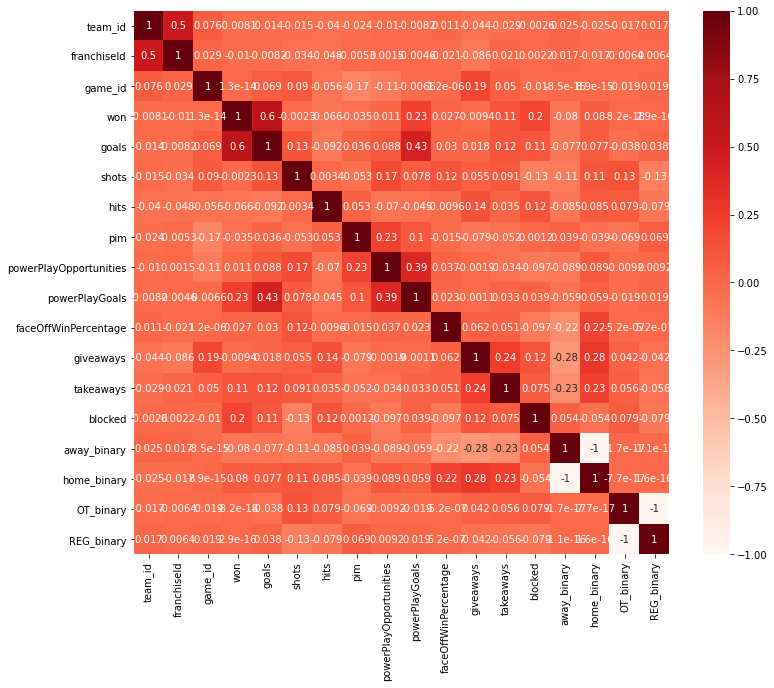

In [166]:
plt.figure(figsize=(12,10))
cor = teams.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [167]:
teams.columns

Index(['team_id', 'franchiseId', 'shortName', 'teamName', 'abbreviation',
       'link', 'game_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide', 'away_binary', 'home_binary', 'OT_binary',
       'REG_binary'],
      dtype='object')

In [169]:
teams.isnull

<bound method DataFrame.isnull of        team_id  franchiseId   shortName   teamName abbreviation  \
0            1           23  New Jersey     Devils          NJD   
1            1           23  New Jersey     Devils          NJD   
2            1           23  New Jersey     Devils          NJD   
3            1           23  New Jersey     Devils          NJD   
4            1           23  New Jersey     Devils          NJD   
...        ...          ...         ...        ...          ...   
51844       11           35     Atlanta  Thrashers          ATL   
51847       11           35     Atlanta  Thrashers          ATL   
51849       11           35     Atlanta  Thrashers          ATL   
51852       11           35     Atlanta  Thrashers          ATL   
51853       11           35     Atlanta  Thrashers          ATL   

                   link     game_id   HoA  won settled_in  ... powerPlayGoals  \
0       /api/v1/teams/1  2016020107  home    0         OT  ...            1.0   

<ipython-input-170-25b231c54434>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.3640548  0.09528426 0.09426581 0.08534154 0.10028365 0.07999666
 0.09159198 0.03211822 0.05706307]


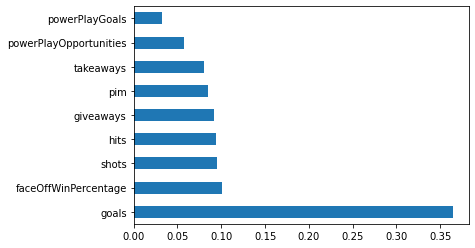

In [170]:
X = teams[['goals','shots','hits','pim','faceOffWinPercentage','takeaways','giveaways','powerPlayGoals','powerPlayOpportunities']]  #independent columns
y = teams[['won']]   #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

# Support Vector Machines

In [171]:
from sklearn.svm import SVC 
from sklearn import preprocessing, neighbors, svm

In [172]:
X = teams[['goals','shots','hits','faceOffWinPercentage','pim']]  #independent columns
y = teams[['won']]   #target column i.e price range
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a linear SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
score=accuracy_score(y_test,svm_predictions)
score

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7769657599133848

# Logistic Regression

In [174]:
X = teams[['goals','shots','hits','faceOffWinPercentage','pim']]  
y = teams[['won']]  

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

logmodel=LogisticRegression()

logmodel.fit(X_train,y_train)

log_predictions=logmodel.predict(X_test)

score2=accuracy_score(y_test,log_predictions)
score2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7841385843821898